In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

# PCA 

In [2]:
data = pd.read_csv('./Datasets/Data Accepted Cleaned For Dimensionality Reduction.csv')

In [3]:
data.shape

(2258141, 88)

In [4]:
data.isnull().sum().sum()

0

## Extracting target features

In [5]:
target_int_rate = data['int_rate']
target_grade = data['grade']
target_subgrade = data['sub_grade']

In [6]:
data.drop(['int_rate','grade','sub_grade'],axis=1,inplace=True)

In [7]:
datetime_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for column in datetime_columns:
    data[column] = pd.to_datetime(data[column])
    data[column + '_year'] = data[column].dt.year
    data[column + '_month'] = data[column].dt.month
    data[column + '_day'] = data[column].dt.day

In [8]:
data.dtypes.value_counts()

float64           67
object            14
int32             12
datetime64[ns]     4
Name: count, dtype: int64

In [9]:
numerical_data = data.select_dtypes(include=['float64', 'int32'])
categorical_data = data.select_dtypes(include=['object'])

In [10]:
numerical_columns = numerical_data.columns.tolist()
categorical_columns = categorical_data.columns.tolist()

In [11]:
categorical_data.shape

(2258141, 14)

In [12]:
numerical_data.shape

(2258141, 79)

# Numerical Data PCA

In [13]:
# Scaling
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(data[numerical_columns])

In [14]:
# PCA
pca = PCA(n_components=0.95)
numerical_reduced = pca.fit_transform(numerical_data_scaled)

In [15]:
pca_columns = ['PCA_Component_' + str(i) for i in range(numerical_reduced.shape[1])]
pca_df = pd.DataFrame(numerical_reduced, columns=pca_columns)

In [16]:
pca_df.head()

,PCA_Component_0,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,...,PCA_Component_32,PCA_Component_33,PCA_Component_34,PCA_Component_35,PCA_Component_36,PCA_Component_37,PCA_Component_38,PCA_Component_39,PCA_Component_40,PCA_Component_41
0,-4.106044,-2.015019,-0.922711,0.017330,1.891090,1.818096,0.741998,0.278728,0.244048,0.417153,...,0.837892,-0.843121,-1.148951,-0.612782,-0.194813,-0.259177,-0.677483,0.097325,-0.495755,-0.148498
1,6.396042,-1.151552,0.188198,-2.931914,-0.069520,1.007682,0.597207,0.181822,0.676380,0.205001,...,-0.905170,-0.888859,-1.798148,0.802240,-0.706709,-0.354019,0.525074,0.663302,-0.359573,-1.861842
2,-1.029270,4.193481,0.203950,-1.112776,0.411735,-0.295923,0.259924,-0.778349,-0.134218,0.236882,...,0.753108,-0.287875,0.908645,-0.106183,-0.933979,1.134252,-0.040205,-0.253181,0.796246,0.072324
3,3.827254,1.910027,4.526960,-2.282167,-1.462872,3.197383,-2.107418,0.466992,0.963532,0.687715,...,-0.196503,-0.297953,-1.993238,-0.224552,0.686533,-0.333773,0.089705,0.072537,0.210545,0.727653
4,2.155775,-0.290886,-1.684681,-0.538968,2.888613,-1.120954,-0.406556,-1.752072,0.114479,1.304035,...,0.256951,-0.438739,0.668388,-0.002468,-0.689562,0.498550,0.510188,1.441008,0.261076,0.296707


In [17]:
pca_df.shape

(2258141, 42)

In [18]:
variance_explained = pca.explained_variance_ratio_ * 100
variance_df = pd.DataFrame({'PCA Component': pca_columns, 'Variance Explained (%)': variance_explained})

In [19]:
# Looking at variance explained list
variance_df

,PCA Component,Variance Explained (%)
0,PCA_Component_0,14.537737
1,PCA_Component_1,8.845541
2,PCA_Component_2,7.672634
3,PCA_Component_3,5.864067
4,PCA_Component_4,4.636053
5,PCA_Component_5,4.232242
6,PCA_Component_6,3.680357
7,PCA_Component_7,3.364979
8,PCA_Component_8,2.775071
9,PCA_Component_9,2.568196


## Merge PCA_df with rest of the features

In [20]:
pca_df.shape, categorical_data.shape

((2258141, 42), (2258141, 14))

In [21]:
pca_df.reset_index(drop=True, inplace=True)
categorical_data.reset_index(drop=True, inplace=True)
merged_data = pd.concat([pca_df, categorical_data], axis=1)

In [22]:
merged_data.shape

(2258141, 56)

In [23]:
#merged_data.to_csv('./Datasets/Dimensionally reduced dataset for modeling.csv')

# Modeling

## Looking in more detail at target classes

In [24]:
merged_data.head()

,PCA_Component_0,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,...,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,-4.106044,-2.015019,-0.922711,0.017330,1.891090,1.818096,0.741998,0.278728,0.244048,0.417153,...,Not Verified,Fully Paid,n,debt_consolidation,PA,w,Individual,N,Cash,N
1,6.396042,-1.151552,0.188198,-2.931914,-0.069520,1.007682,0.597207,0.181822,0.676380,0.205001,...,Not Verified,Fully Paid,n,small_business,SD,w,Individual,N,Cash,N
2,-1.029270,4.193481,0.203950,-1.112776,0.411735,-0.295923,0.259924,-0.778349,-0.134218,0.236882,...,Not Verified,Fully Paid,n,home_improvement,IL,w,Joint App,N,Cash,N
3,3.827254,1.910027,4.526960,-2.282167,-1.462872,3.197383,-2.107418,0.466992,0.963532,0.687715,...,Source Verified,Current,n,debt_consolidation,NJ,w,Individual,N,Cash,N
4,2.155775,-0.290886,-1.684681,-0.538968,2.888613,-1.120954,-0.406556,-1.752072,0.114479,1.304035,...,Source Verified,Fully Paid,n,major_purchase,PA,w,Individual,N,Cash,N


In [25]:
value_counts_grade = target_grade.value_counts()
proportions_grade = target_grade.value_counts(normalize=True) * 100
combined_grade = pd.DataFrame({'Counts': value_counts_grade, 'Proportions (%)': proportions_grade})

value_counts_subgrade = target_subgrade.value_counts()
proportions_subgrade = target_subgrade.value_counts(normalize=True) * 100
combined_subgrade = pd.DataFrame({'Counts': value_counts_subgrade, 'Proportions (%)': proportions_subgrade})

print("Grade Counts and Proportions")
print(combined_grade)
print("\nSubgrade Counts and Proportions")
print(combined_subgrade)

Grade Counts and Proportions
       Counts  Proportions (%)
grade                         
B      663102        29.364951
C      649396        28.757992
A      432828        19.167448
D      323839        14.340956
E      135235         5.988776
F       41653         1.844570
G       12088         0.535308

Subgrade Counts and Proportions
           Counts  Proportions (%)
sub_grade                         
C1         145781         6.455797
B5         140163         6.207008
B4         139693         6.186195
B3         131430         5.820274
C2         130974         5.800081
C3         129079         5.716162
C4         126982         5.623298
B2         126555         5.604389
B1         125261         5.547085
C5         116580         5.162654
A5         107564         4.763387
A4          95826         4.243579
A1          86768         3.842453
D1          81637         3.615230
A3          73144         3.239125
D2          72771         3.222607
A2          69526         3.0

- In both features we have very low frequency of lowest grades of loans, which might lead to issues with modeling. I will merge them into less categories due to this. 

In [26]:
target_data = pd.DataFrame({
    'grade': target_grade,
    'sub_grade': target_subgrade,
    'int_rate': target_int_rate
})

In [27]:
target_data['grade_merged'] = target_data['grade'].replace(['F', 'G'], 'FG')

threshold = 1  # in %
value_counts_subgrade = target_data['sub_grade'].value_counts(normalize=True) * 100
to_merge_subgrade = value_counts_subgrade[value_counts_subgrade < threshold].index
target_data['sub_grade_merged'] = target_data['sub_grade'].replace(to_merge_subgrade, 'Other')

In [28]:
target_data.nunique()

grade                 7
sub_grade            35
int_rate            673
grade_merged          6
sub_grade_merged     26
dtype: int64

- We reduced number of categories from 7 to 6 in grade feature, from 35 to 26 in subgrade 

In [29]:
target_data['int_rate'].describe().round(3)

count    2258141.000
mean          13.089
std            4.829
min            5.310
25%            9.490
50%           12.620
75%           15.990
max           30.990
Name: int_rate, dtype: float64

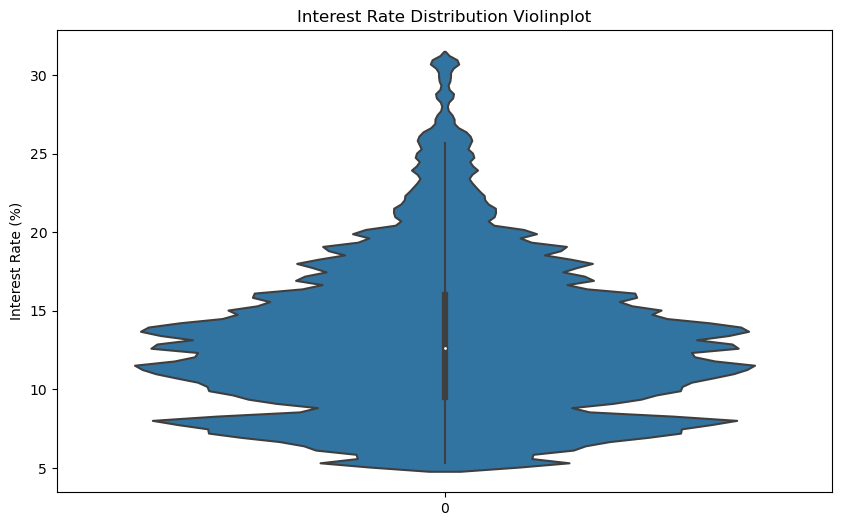

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(target_int_rate)
plt.title('Interest Rate Distribution Violinplot')
plt.ylabel('Interest Rate (%)')
plt.show()

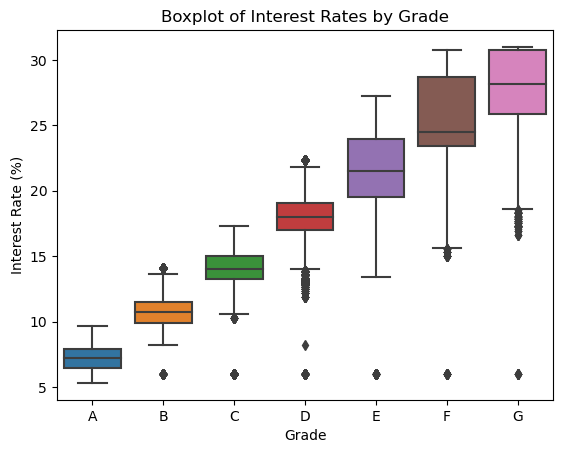

In [31]:
median_int_rate = target_data.groupby('grade')['int_rate'].median()
sorted_grades = median_int_rate.sort_values().index.tolist()
sns.boxplot(x='grade', y='int_rate', data=target_data, order=sorted_grades)
plt.title('Boxplot of Interest Rates by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

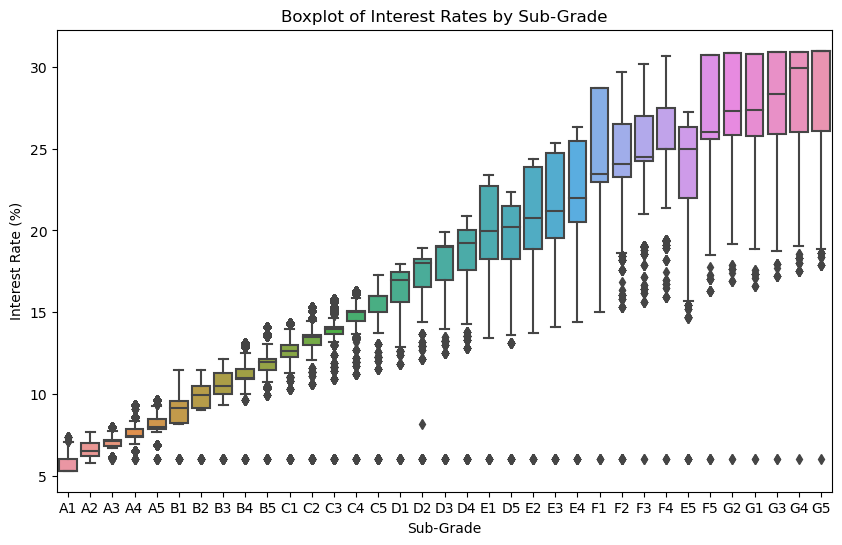

In [32]:
median_int_rate = target_data.groupby('sub_grade')['int_rate'].median()
sorted_grades = median_int_rate.sort_values().index.tolist()
plt.figure(figsize=(10, 6))
sns.boxplot(x='sub_grade', y='int_rate', data=target_data, order=sorted_grades)
plt.title('Boxplot of Interest Rates by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

- We can see clear correlation between grade, sub_grade and interest rate
- Lower the grade, higher the interest rate
- Also interesting observation that range of interest rates increases as sub_grade decreases, best grade having least variance, and lower grades getting increasingly more variance

### Grade Prediction Model

In [33]:
target_grade

0          C
1          C
2          B
3          C
4          F
          ..
2258136    C
2258137    B
2258138    B
2258139    C
2258140    C
Name: grade, Length: 2258141, dtype: object

In [34]:
merged_data.head()

,PCA_Component_0,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,...,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,-4.106044,-2.015019,-0.922711,0.017330,1.891090,1.818096,0.741998,0.278728,0.244048,0.417153,...,Not Verified,Fully Paid,n,debt_consolidation,PA,w,Individual,N,Cash,N
1,6.396042,-1.151552,0.188198,-2.931914,-0.069520,1.007682,0.597207,0.181822,0.676380,0.205001,...,Not Verified,Fully Paid,n,small_business,SD,w,Individual,N,Cash,N
2,-1.029270,4.193481,0.203950,-1.112776,0.411735,-0.295923,0.259924,-0.778349,-0.134218,0.236882,...,Not Verified,Fully Paid,n,home_improvement,IL,w,Joint App,N,Cash,N
3,3.827254,1.910027,4.526960,-2.282167,-1.462872,3.197383,-2.107418,0.466992,0.963532,0.687715,...,Source Verified,Current,n,debt_consolidation,NJ,w,Individual,N,Cash,N
4,2.155775,-0.290886,-1.684681,-0.538968,2.888613,-1.120954,-0.406556,-1.752072,0.114479,1.304035,...,Source Verified,Fully Paid,n,major_purchase,PA,w,Individual,N,Cash,N


In [35]:
categorical_columns

['term',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [36]:
X = merged_data
y = target_grade

In [37]:
cat_features = categorical_columns

In [38]:
sample_size = 100000  # define your sample size here
X_sampled = X.sample(n=sample_size, random_state=42)
y_sampled = y.loc[X_sampled.index]

X_train, X_temp, y_train, y_temp = train_test_split(X_sampled, y_sampled, stratify=y_sampled, test_size=0.3, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=3)

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
validation_pool = Pool(data=X_val, label=y_val, cat_features=cat_features)

# Model for Grade class

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split(X_sampled, y_sampled, stratify=y_sampled, test_size=0.3, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=3)

In [40]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [41]:
# Pool with original data
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
validation_pool = Pool(data=X_val, label=y_val, cat_features=cat_features)

# Pool with ROS-balanced data
train_pool_ros = Pool(data=X_train_ros, label=y_train_ros, cat_features=cat_features)

### Model 1

In [42]:
model_params = {
    'loss_function': 'MultiClass',
    'eval_metric': 'TotalF1',
    'cat_features': cat_features,
    'early_stopping_rounds': 50,
    'verbose': 50
}

# Train model with original data
model_original = CatBoostClassifier(**model_params)
model_original.fit(train_pool, eval_set=validation_pool, plot=True)

# Train model with ROS data
model_ros = CatBoostClassifier(**model_params)
model_ros.fit(train_pool_ros, eval_set=validation_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.117552
0:	learn: 0.3981400	test: 0.3948884	best: 0.3948884 (0)	total: 545ms	remaining: 9m 4s
50:	learn: 0.4694214	test: 0.4569296	best: 0.4569296 (50)	total: 17.3s	remaining: 5m 21s
100:	learn: 0.4979489	test: 0.4704969	best: 0.4715674 (99)	total: 33.5s	remaining: 4m 58s
150:	learn: 0.5219961	test: 0.4847863	best: 0.4847863 (150)	total: 49.9s	remaining: 4m 40s
200:	learn: 0.5420602	test: 0.4935495	best: 0.4943814 (196)	total: 1m 6s	remaining: 4m 23s
250:	learn: 0.5582160	test: 0.4967815	best: 0.4976633 (248)	total: 1m 23s	remaining: 4m 10s
300:	learn: 0.5733169	test: 0.5000979	best: 0.5011755 (293)	total: 1m 41s	remaining: 3m 56s
350:	learn: 0.5850886	test: 0.5008724	best: 0.5025872 (332)	total: 1m 59s	remaining: 3m 40s
400:	learn: 0.5959291	test: 0.5027213	best: 0.5049152 (376)	total: 2m 16s	remaining: 3m 23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5049152344
bestIteration = 376

Shrink model to first 377 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.119278
0:	learn: 0.3215987	test: 0.3375025	best: 0.3375025 (0)	total: 676ms	remaining: 11m 14s
50:	learn: 0.5352760	test: 0.4257937	best: 0.4257937 (50)	total: 33.6s	remaining: 10m 25s
100:	learn: 0.6060956	test: 0.4357497	best: 0.4357497 (100)	total: 1m 5s	remaining: 9m 40s
150:	learn: 0.6473676	test: 0.4470792	best: 0.4470792 (150)	total: 1m 36s	remaining: 9m 3s
200:	learn: 0.6742794	test: 0.4565262	best: 0.4566765 (198)	total: 2m 8s	remaining: 8m 29s
250:	learn: 0.6961518	test: 0.4627972	best: 0.4646804 (248)	total: 2m 39s	remaining: 7m 56s
300:	learn: 0.7111688	test: 0.4692264	best: 0.4694399 (299)	total: 3m 11s	remaining: 7m 25s
350:	learn: 0.7246106	test: 0.4738803	best: 0.4738803 (350)	total: 3m 44s	remaining: 6m 54s
400:	learn: 0.7345506	test: 0.4778608	best: 0.4778608 (400)	total: 4m 17s	remaining: 6m 24s
450:	learn: 0.7438346	test: 0.4761136	best: 0.4781761 (402)	total: 4m 50s	remaining: 5m 53s
Stopped by overfitting detector  (50 iterations wait)

best

In [43]:
y_pred_original = model_original.predict(X_test)

# Model report for the original model
print("Model trained on Original Data:")
print(classification_report(y_test, y_pred_original))
print(confusion_matrix(y_test, y_pred_original))

Model trained on Original Data:
              precision    recall  f1-score   support

           A       0.73      0.69      0.71      2876
           B       0.52      0.59      0.55      4441
           C       0.46      0.60      0.52      4302
           D       0.39      0.19      0.26      2129
           E       0.37      0.20      0.26       893
           F       0.30      0.07      0.12       276
           G       0.00      0.00      0.00        83

    accuracy                           0.52     15000
   macro avg       0.40      0.33      0.35     15000
weighted avg       0.51      0.52      0.50     15000

[[1977  819   79    1    0    0    0]
 [ 600 2633 1163   42    3    0    0]
 [ 106 1301 2601  238   52    4    0]
 [  11  290 1292  406  120   10    0]
 [   1   43  396  259  175   18    1]
 [   0    7   84   72   92   20    1]
 [   0    1   21   15   31   15    0]]


In [44]:
y_pred_ros = model_ros.predict(X_test)

# Model report for the ROS model
print("\nModel trained on ROS Data:")
print(classification_report(y_test, y_pred_ros))
print(confusion_matrix(y_test, y_pred_ros))


Model trained on ROS Data:
              precision    recall  f1-score   support

           A       0.66      0.76      0.71      2876
           B       0.53      0.50      0.52      4441
           C       0.49      0.37      0.42      4302
           D       0.31      0.35      0.33      2129
           E       0.22      0.32      0.26       893
           F       0.15      0.22      0.17       276
           G       0.11      0.06      0.08        83

    accuracy                           0.47     15000
   macro avg       0.35      0.37      0.36     15000
weighted avg       0.48      0.47      0.47     15000

[[2199  581   73   19    3    1    0]
 [ 908 2236  902  283   88   22    2]
 [ 196 1134 1586  912  385   78   11]
 [  33  236  560  750  425  112   13]
 [   3   40  123  317  287  113   10]
 [   0    5   18   85  103   60    5]
 [   0    1    3   24   24   26    5]]


- ROS Model did better, with better recall for most classes.
- We can see general trend, the lower the class, the less good our model predicts. 
- Possible changes of merging more categories into one. 

### Model 2 with CV

In [45]:
from catboost import CatBoostClassifier, Pool, cv

model_params = {
    'loss_function': 'MultiClass',
    'eval_metric': 'TotalF1',  
    'cat_features': cat_features,
    'early_stopping_rounds': 50,
    'verbose': 100
}


cv_results = cv(
    pool=train_pool_ros,
    params=model_params,
    fold_count=3,  
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 0.3220122	test: 0.3172392	best: 0.3172392 (0)	total: 496ms	remaining: 8m 15s
100:	learn: 0.4881811	test: 0.4811666	best: 0.4811666 (100)	total: 48.7s	remaining: 7m 13s
200:	learn: 0.5476096	test: 0.5323720	best: 0.5323720 (200)	total: 1m 37s	remaining: 6m 25s
300:	learn: 0.5809616	test: 0.5670927	best: 0.5670927 (300)	total: 2m 25s	remaining: 5m 37s
400:	learn: 0.6074315	test: 0.5876015	best: 0.5882264 (398)	total: 3m 13s	remaining: 4m 49s
500:	learn: 0.6301946	test: 0.6061813	best: 0.6063654 (495)	total: 4m 2s	remaining: 4m 1s
600:	learn: 0.6516250	test: 0.6252752	best: 0.6252752 (600)	total: 4m 53s	remaining: 3m 14s
700:	learn: 0.6681243	test: 0.6401440	best: 0.6403995 (698)	total: 5m 42s	remaining: 2m 26s
800:	learn: 0.6802501	test: 0.6497064	best: 0.6497077 (799)	total: 6m 31s	remaining: 1m 37s
900:	learn: 0.6914812	test: 0.6585210	best: 0.6585769 (898)	total: 7m 20s	remaining: 48.4s
999:	learn: 0.7021681	test: 0.6655711	best: 0.6656061 (997)	total:

In [46]:
# Train the model using the best parameters found
model_ros = CatBoostClassifier(**model_params)
model_ros.fit(train_pool_ros, eval_set=validation_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.119278
0:	learn: 0.3215987	test: 0.3375025	best: 0.3375025 (0)	total: 662ms	remaining: 11m 1s
100:	learn: 0.6060956	test: 0.4357497	best: 0.4357497 (100)	total: 1m 8s	remaining: 10m 5s
200:	learn: 0.6742794	test: 0.4565262	best: 0.4566765 (198)	total: 2m 14s	remaining: 8m 54s
300:	learn: 0.7111688	test: 0.4692264	best: 0.4694399 (299)	total: 3m 21s	remaining: 7m 48s
400:	learn: 0.7345506	test: 0.4778608	best: 0.4778608 (400)	total: 4m 29s	remaining: 6m 42s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.478176087
bestIteration = 402

Shrink model to first 403 iterations.


In [47]:
# Evaluate the model
y_pred_ros = model_ros.predict(X_test)
print("Model trained on ROS Data:")
print(classification_report(y_test, y_pred_ros))
print(confusion_matrix(y_test, y_pred_ros))

Model trained on ROS Data:
              precision    recall  f1-score   support

           A       0.66      0.76      0.71      2876
           B       0.53      0.50      0.52      4441
           C       0.49      0.37      0.42      4302
           D       0.31      0.35      0.33      2129
           E       0.22      0.32      0.26       893
           F       0.15      0.22      0.17       276
           G       0.11      0.06      0.08        83

    accuracy                           0.47     15000
   macro avg       0.35      0.37      0.36     15000
weighted avg       0.48      0.47      0.47     15000

[[2199  581   73   19    3    1    0]
 [ 908 2236  902  283   88   22    2]
 [ 196 1134 1586  912  385   78   11]
 [  33  236  560  750  425  112   13]
 [   3   40  123  317  287  113   10]
 [   0    5   18   85  103   60    5]
 [   0    1    3   24   24   26    5]]


Evaluation of the outputs

- Best Performance in Higher Classes: Class A shows the best performance, with a gradual decrease in precision and recall from Class B to G.
- Moderate Overall Accuracy: The model achieves 47% accuracy, indicating moderate prediction capability.
- Significant Class Confusion: Notable confusion between Classes B and C, and C and D, indicating difficulty in distinguishing these classes.

In [48]:
y_pred_entire_ros = model_ros.predict(X)
report_entire_ros = classification_report(y, y_pred_entire_ros)
confusion_matrix_entire_ros = confusion_matrix(y, y_pred_entire_ros)

print("Model trained on ROS Data (Evaluated on Entire Dataset):")
print(report_entire_ros)
print("Confusion Matrix:")
print(confusion_matrix_entire_ros)

Model trained on ROS Data (Evaluated on Entire Dataset):
              precision    recall  f1-score   support

           A       0.66      0.77      0.71    432828
           B       0.53      0.51      0.52    663102
           C       0.49      0.36      0.41    649396
           D       0.32      0.35      0.33    323839
           E       0.24      0.36      0.28    135235
           F       0.16      0.23      0.19     41653
           G       0.10      0.08      0.09     12088

    accuracy                           0.48   2258141
   macro avg       0.36      0.38      0.36   2258141
weighted avg       0.48      0.48      0.48   2258141

Confusion Matrix:
[[334227  86567   9082   2289    557    100      6]
 [134270 336048 133616  44390  12454   2091    233]
 [ 30530 171190 233899 139575  59738  12755   1709]
 [  5004  38665  83995 114366  62539  16874   2396]
 [   718   6092  18113  44098  48189  15671   2354]
 [    51    531   2620  11263  16105   9641   1442]
 [     6     92 

Evaluation 

- Slightly Improved Performance: Shows a marginal increase in accuracy (48%) and precision-recall for most classes compared to the first model.
- Consistent Performance Across Classes: Similar performance trends as the first model, with higher classes performing better.
- Persistent Class Confusion: Similar confusion pattern as the first model, especially among adjacent classes, indicating a consistent issue in class differentiation.

## Saving models

In [50]:
# Save the model to a file. The .bin extension is used by default for CatBoost models.
model_original.save_model("model_original_grade.bin")
# Similarly, for the second model
model_ros.save_model("model_ros_grade.bin")


## Build Model for interest rate

In [51]:
X = merged_data
y = target_int_rate
cat_features = categorical_columns

In [52]:
sample_size = 1000000  # Define your sample size
X_sampled = X.sample(n=sample_size, random_state=42)
y_sampled = y.loc[X_sampled.index]

X_train, X_temp, y_train, y_temp = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=3)

In [53]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
validation_pool = Pool(data=X_val, label=y_val, cat_features=cat_features)

### Model 1

In [54]:
model_int = CatBoostRegressor(
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

model_int.fit(train_pool, eval_set=validation_pool,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.142422
0:	learn: 4.5989916	test: 4.5831272	best: 4.5831272 (0)	total: 335ms	remaining: 5m 34s
100:	learn: 3.1842522	test: 3.1782592	best: 3.1782592 (100)	total: 30.9s	remaining: 4m 34s
200:	learn: 3.0520928	test: 3.0545821	best: 3.0545821 (200)	total: 1m 1s	remaining: 4m 5s
300:	learn: 2.9698031	test: 2.9791520	best: 2.9791520 (300)	total: 1m 32s	remaining: 3m 33s
400:	learn: 2.9099350	test: 2.9271935	best: 2.9271935 (400)	total: 2m 2s	remaining: 3m 2s
500:	learn: 2.8623335	test: 2.8861668	best: 2.8861668 (500)	total: 2m 32s	remaining: 2m 31s
600:	learn: 2.8210951	test: 2.8511762	best: 2.8511762 (600)	total: 3m 2s	remaining: 2m
700:	learn: 2.7866359	test: 2.8236532	best: 2.8236532 (700)	total: 3m 32s	remaining: 1m 30s
800:	learn: 2.7545455	test: 2.7974828	best: 2.7974828 (800)	total: 4m 2s	remaining: 1m
900:	learn: 2.7258875	test: 2.7755585	best: 2.7755585 (900)	total: 4m 33s	remaining: 30s
999:	learn: 2.6991524	test: 2.7550012	best: 2.7550012 (999)	total: 5m 3s	

In [55]:
model_hyperparameters = model_int.get_all_params()
model_hyperparameters

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType

In [56]:
y_pred = model_int.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [57]:
print("Model Performance Summary:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance Summary:
RMSE (Root Mean Squared Error): 2.76
MAE (Mean Absolute Error): 2.05
R² Score: 0.67


- RMSE of 2.76: Indicates an average deviation of 2.76 units from the true values, showing moderate prediction accuracy.
- MAE of 2.05: Reflects an average absolute error of 2.05 units, indicating the predictions are relatively close to actual values.
- R² Score of 0.67: Suggests that approximately 67% of the variability in the dependent variable is explained by the model, indicating a good fit.

- Model Training Progress:
- Learning Rate Set to 0.142422: A moderately high learning rate, implying faster learning but potentially less precision.
- Improvement Over Iterations: The model's error (RMSE) consistently decreases over iterations, indicating effective learning.
- Best RMSE at 999th Iteration: The lowest RMSE achieved on the test set is 2.755, close to the final reported RMSE, showing stable convergence.
- Indication to increase iterations. 

### Model 2

In [58]:
model_int_2 = CatBoostRegressor(
    iterations=2000,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    depth=7,
    early_stopping_rounds=100
     
)

model_int_2.fit(train_pool, eval_set=validation_pool,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.093314
0:	learn: 4.6707331	test: 4.6547377	best: 4.6547377 (0)	total: 383ms	remaining: 12m 44s
100:	learn: 3.2224779	test: 3.2162766	best: 3.2162766 (100)	total: 36.8s	remaining: 11m 31s
200:	learn: 3.0863420	test: 3.0888982	best: 3.0888982 (200)	total: 1m 13s	remaining: 10m 56s
300:	learn: 2.9989487	test: 3.0091783	best: 3.0091783 (300)	total: 1m 49s	remaining: 10m 17s
400:	learn: 2.9356518	test: 2.9537513	best: 2.9537513 (400)	total: 2m 25s	remaining: 9m 41s
500:	learn: 2.8845276	test: 2.9108482	best: 2.9108482 (500)	total: 3m 2s	remaining: 9m 5s
600:	learn: 2.8429132	test: 2.8761850	best: 2.8761850 (600)	total: 3m 38s	remaining: 8m 28s
700:	learn: 2.8058961	test: 2.8464247	best: 2.8464247 (700)	total: 4m 15s	remaining: 7m 53s
800:	learn: 2.7723209	test: 2.8202317	best: 2.8202317 (800)	total: 4m 51s	remaining: 7m 17s
900:	learn: 2.7416639	test: 2.7973103	best: 2.7973103 (900)	total: 5m 29s	remaining: 6m 41s
1000:	learn: 2.7146550	test: 2.7771903	best: 2.7771903

In [59]:
y_pred = model_int_2.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [60]:
print("Model Performance Summary:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance Summary:
RMSE (Root Mean Squared Error): 2.65
MAE (Mean Absolute Error): 1.94
R² Score: 0.70


- Better score after second trial. 

In [61]:
y_pred_entire = model_int_2.predict(X)
rmse_entire = mean_squared_error(y, y_pred_entire, squared=False)
mae_entire = mean_absolute_error(y, y_pred_entire)
r2_entire = r2_score(y, y_pred_entire)
print(f"RMSE on Entire Dataset: {rmse_entire}")
print(f"MAE on Entire Dataset: {mae_entire}")
print(f"R² Score on Entire Dataset: {r2_entire}")

RMSE on Entire Dataset: 2.6057271314662356
MAE on Entire Dataset: 1.913264295860864
R² Score on Entire Dataset: 0.7088660407963606


- RMSE of 2.65: A decrease from the previous model, indicating more accurate predictions.
- MAE of 1.94: Lower than the previous model, suggesting closer predictions to actual values.
- R² Score of 0.70: A higher score compared to the previous model, indicating a better fit to the data.
- Learning Rate of 0.093314: Slower than the previous model, potentially leading to more precise convergence.
- Steady Decrease in Test Error: Indicates effective learning and generalization over iterations.
- Best RMSE at Final Iteration: Shows that the model effectively utilized the increased number of iterations to refine its predictions.

## Saving models

In [62]:
model_int.save_model("model_int.bin")
model_int_2.save_model("model_int_2.bin")